In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data=pd.read_csv('Daftar_Buku.csv')

In [4]:
data.head()

,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Kode_Bahasa,Format_Buku,Ebook,Penerbit
0,1,439785960,Harry Potter and the Half-Blood Prince (Harry ...,"[J.K. Rowling, Mary GrandPré]",2006.0,1977181,4.56,652,26170,eng,Paperback,False,Scholastic Inc.
1,2,439358078,Harry Potter and the Order of the Phoenix (Har...,"[J.K. Rowling, Mary GrandPré]",2004.0,2030160,4.49,870,27662,eng,Paperback,False,Scholastic Inc.
2,3,439554934,Harry Potter and the Sorcerer's Stone (Harry P...,"[J.K. Rowling, Mary GrandPré]",1997.0,5750685,4.47,320,70459,eng,Hardcover,False,Scholastic Inc
3,4,439554896,Harry Potter and the Chamber of Secrets (Harry...,[J.K. Rowling],2003.0,6289,4.41,352,243,eng,Hardcover,False,Scholastic
4,5,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,"[J.K. Rowling, Mary GrandPré]",2004.0,2189333,4.56,435,34225,eng,Mass Market Paperback,False,Scholastic Inc.


In [5]:
data.tail()

,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Kode_Bahasa,Format_Buku,Ebook,Penerbit
7266,9992,3596106729,Die Unsterblichkeit,[Milan Kundera],NaN,55,3.78,179,1,ger,Paperback,False,Fischer
7267,9993,3596151287,Die Unwissenheit,"[Kōbō Abe, Juliet Winters Carpenter]",1989.0,793,3.70,352,37,NaN,Paperback,False,Vintage
7268,9996,679721614,The Ark Sakura,"[Kōbō Abe, E. Dale Saunders]",2001.0,1356,3.55,304,100,eng,Paperback,False,Vintage
7269,9997,375726527,The Ruined Map,"[Kōbō Abe, E. Dale Saunders]",1991.0,14347,3.91,241,926,eng,Paperback,False,Vintage
7270,9998,679733787,The Woman in the Dunes,"[Kōbō Abe, E. Dale Saunders]",2001.0,3352,3.65,178,246,eng,Paperback,False,Vintage


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7271 entries, 0 to 7270
Data columns (total 13 columns):
Id_Buku            7271 non-null int64
Isbn               7147 non-null object
Judul_Buku         7271 non-null object
Penulis            7271 non-null object
Tahun_Publikasi    7038 non-null float64
Total_Ratings      7271 non-null int64
Rataan_Rating      7271 non-null float64
Jumlah_Halaman     7271 non-null int64
Jumlah_Review      7271 non-null int64
Kode_Bahasa        3336 non-null object
Format_Buku        6982 non-null object
Ebook              7271 non-null bool
Penerbit           7032 non-null object
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 688.8+ KB


In [7]:
import petl as etl

In [8]:
dt= 'Daftar_Buku.csv'

In [9]:
t1 = etl.fromcsv(dt, encoding="utf8")
t1.display(10)

Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Kode_Bahasa,Format_Buku,Ebook,Penerbit
1,439785960,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)","[J.K. Rowling, Mary GrandPré]",2006,1977181,4.56,652,26170,eng,Paperback,FALSE,Scholastic Inc.
2,439358078,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)","[J.K. Rowling, Mary GrandPré]",2004,2030160,4.49,870,27662,eng,Paperback,FALSE,Scholastic Inc.
3,439554934,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","[J.K. Rowling, Mary GrandPré]",1997,5750685,4.47,320,70459,eng,Hardcover,FALSE,Scholastic Inc
4,439554896,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",[J.K. Rowling],2003,6289,4.41,352,243,eng,Hardcover,FALSE,Scholastic
5,043965548X,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)","[J.K. Rowling, Mary GrandPré]",2004,2189333,4.56,435,34225,eng,Mass Market Paperback,FALSE,Scholastic Inc.
6,,"Harry Potter and the Goblet of Fire (Harry Potter, #4)","[J.K. Rowling, Mary GrandPré]",2002,2067027,4.55,734,29709,eng,Paperback,FALSE,Scholastic
8,439682584,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","[J.K. Rowling, Mary GrandPré]",2004,38836,4.78,2690,154,eng,Paperback,FALSE,Scholastic
9,976540606,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",[W. Frederick Zimmerman],2005,18,3.69,152,1,en-US,Paperback,FALSE,Nimble Books
10,439827604,"Harry Potter Collection (Harry Potter, #1-6)",[J.K. Rowling],2005,27560,4.73,3342,798,eng,Hardcover,FALSE,Scholastic
11,,"The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",[Douglas Adams],2005,944690,4.22,216,15771,eng,Mass Market Paperback,FALSE,Del Rey Books


In [10]:
kolom = t1.fieldnames()
kolom

('Id_Buku',
 'Isbn',
 'Judul_Buku',
 'Penulis',
 'Tahun_Publikasi',
 'Total_Ratings',
 'Rataan_Rating',
 'Jumlah_Halaman',
 'Jumlah_Review',
 'Kode_Bahasa',
 'Format_Buku',
 'Ebook',
 'Penerbit')

In [11]:
#Membaca Nama Kolom
for f in kolom:
    print(f,'\t', t1.typecounter(f))

Id_Buku 	 Counter({'str': 7271})
Isbn 	 Counter({'str': 7271})
Judul_Buku 	 Counter({'str': 7271})
Penulis 	 Counter({'str': 7271})
Tahun_Publikasi 	 Counter({'str': 7271})
Total_Ratings 	 Counter({'str': 7271})
Rataan_Rating 	 Counter({'str': 7271})
Jumlah_Halaman 	 Counter({'str': 7271})
Jumlah_Review 	 Counter({'str': 7271})
Kode_Bahasa 	 Counter({'str': 7271})
Format_Buku 	 Counter({'str': 7271})
Ebook 	 Counter({'str': 7271})
Penerbit 	 Counter({'str': 7271})


In [12]:
def to_int(text):
    return int(text)
t2 = t1.convert('Jumlah_Halaman',to_int)

In [13]:
t3 = t2.convert('Total_Ratings',to_int)

In [14]:
t4 = t3.convert('Jumlah_Review',to_int)

In [15]:
def to_float(text):
    return float(text)
t5 = t4.convert('Rataan_Rating',to_float)

In [16]:
def to_list(text):
    if text[0]=="[" and text[-1]=="]":
        items =  text[1:-1].split(', ') # turn values to list
    else:
        return None
    output=[]
    for i in items:
        output +=[i]  
    return output
t6 = t5.convert('Penulis',to_list)

In [17]:
#Membaca type kolom
for f in kolom:
    print(f,'\t', t6.typecounter(f))

Id_Buku 	 Counter({'str': 7271})
Isbn 	 Counter({'str': 7271})
Judul_Buku 	 Counter({'str': 7271})
Penulis 	 Counter({'list': 7271})
Tahun_Publikasi 	 Counter({'str': 7271})
Total_Ratings 	 Counter({'int': 7271})
Rataan_Rating 	 Counter({'float': 7271})
Jumlah_Halaman 	 Counter({'int': 7271})
Jumlah_Review 	 Counter({'int': 7271})
Kode_Bahasa 	 Counter({'str': 7271})
Format_Buku 	 Counter({'str': 7271})
Ebook 	 Counter({'str': 7271})
Penerbit 	 Counter({'str': 7271})


In [18]:
def Jumlah_Penulis(row):
    return int(len(row['Penulis']))

In [19]:
t7 = t6.addfield('Jumlah_Penulis',Jumlah_Penulis)

In [20]:
t8 = t7.cut(['Id_Buku','Isbn','Judul_Buku','Penulis','Tahun_Publikasi','Total_Ratings','Rataan_Rating',
                'Jumlah_Halaman','Jumlah_Review','Kode_Bahasa','Format_Buku','Ebook','Penerbit','Jumlah_Penulis']) # renaming columns

In [21]:
t8.display(10)

Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Kode_Bahasa,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
1,439785960,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)","['J.K. Rowling', 'Mary GrandPré']",2006,1977181,4.56,652,26170,eng,Paperback,FALSE,Scholastic Inc.,2
2,439358078,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)","['J.K. Rowling', 'Mary GrandPré']",2004,2030160,4.49,870,27662,eng,Paperback,FALSE,Scholastic Inc.,2
3,439554934,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997,5750685,4.47,320,70459,eng,Hardcover,FALSE,Scholastic Inc,2
4,439554896,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",['J.K. Rowling'],2003,6289,4.41,352,243,eng,Hardcover,FALSE,Scholastic,1
5,043965548X,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)","['J.K. Rowling', 'Mary GrandPré']",2004,2189333,4.56,435,34225,eng,Mass Market Paperback,FALSE,Scholastic Inc.,2
6,,"Harry Potter and the Goblet of Fire (Harry Potter, #4)","['J.K. Rowling', 'Mary GrandPré']",2002,2067027,4.55,734,29709,eng,Paperback,FALSE,Scholastic,2
8,439682584,"Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)","['J.K. Rowling', 'Mary GrandPré']",2004,38836,4.78,2690,154,eng,Paperback,FALSE,Scholastic,2
9,976540606,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",['W. Frederick Zimmerman'],2005,18,3.69,152,1,en-US,Paperback,FALSE,Nimble Books,1
10,439827604,"Harry Potter Collection (Harry Potter, #1-6)",['J.K. Rowling'],2005,27560,4.73,3342,798,eng,Hardcover,FALSE,Scholastic,1
11,,"The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",['Douglas Adams'],2005,944690,4.22,216,15771,eng,Mass Market Paperback,FALSE,Del Rey Books,1


In [ ]:
t8.tocsv('book_list.csv', encoding="utf8")

In [22]:
print("ETL Selesai")

ETL Selesai


In [23]:
book=pd.read_csv('book_list.csv')

In [24]:
book.head()

,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Kode_Bahasa,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
0,1,439785960,Harry Potter and the Half-Blood Prince (Harry ...,"['J.K. Rowling', 'Mary GrandPré']",2006.0,1977181,4.56,652,26170,eng,Paperback,False,Scholastic Inc.,2
1,2,439358078,Harry Potter and the Order of the Phoenix (Har...,"['J.K. Rowling', 'Mary GrandPré']",2004.0,2030160,4.49,870,27662,eng,Paperback,False,Scholastic Inc.,2
2,3,439554934,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",1997.0,5750685,4.47,320,70459,eng,Hardcover,False,Scholastic Inc,2
3,4,439554896,Harry Potter and the Chamber of Secrets (Harry...,['J.K. Rowling'],2003.0,6289,4.41,352,243,eng,Hardcover,False,Scholastic,1
4,5,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,"['J.K. Rowling', 'Mary GrandPré']",2004.0,2189333,4.56,435,34225,eng,Mass Market Paperback,False,Scholastic Inc.,2


In [25]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7271 entries, 0 to 7270
Data columns (total 14 columns):
Id_Buku            7271 non-null int64
Isbn               7147 non-null object
Judul_Buku         7271 non-null object
Penulis            7271 non-null object
Tahun_Publikasi    7038 non-null float64
Total_Ratings      7271 non-null int64
Rataan_Rating      7271 non-null float64
Jumlah_Halaman     7271 non-null int64
Jumlah_Review      7271 non-null int64
Kode_Bahasa        3336 non-null object
Format_Buku        6982 non-null object
Ebook              7271 non-null bool
Penerbit           7032 non-null object
Jumlah_Penulis     7271 non-null int64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 745.6+ KB


In [26]:
del book['Kode_Bahasa']

In [27]:
book=book.dropna()

In [28]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 0 to 7270
Data columns (total 13 columns):
Id_Buku            6739 non-null int64
Isbn               6739 non-null object
Judul_Buku         6739 non-null object
Penulis            6739 non-null object
Tahun_Publikasi    6739 non-null float64
Total_Ratings      6739 non-null int64
Rataan_Rating      6739 non-null float64
Jumlah_Halaman     6739 non-null int64
Jumlah_Review      6739 non-null int64
Format_Buku        6739 non-null object
Ebook              6739 non-null bool
Penerbit           6739 non-null object
Jumlah_Penulis     6739 non-null int64
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 691.0+ KB


In [29]:
book['Tahun_Publikasi']=book['Tahun_Publikasi'].astype(int)
book['Id_Buku']=book['Id_Buku'].astype(str)
book['Ebook']=book['Ebook'].astype(str)

In [30]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6739 entries, 0 to 7270
Data columns (total 13 columns):
Id_Buku            6739 non-null object
Isbn               6739 non-null object
Judul_Buku         6739 non-null object
Penulis            6739 non-null object
Tahun_Publikasi    6739 non-null int32
Total_Ratings      6739 non-null int64
Rataan_Rating      6739 non-null float64
Jumlah_Halaman     6739 non-null int64
Jumlah_Review      6739 non-null int64
Format_Buku        6739 non-null object
Ebook              6739 non-null object
Penerbit           6739 non-null object
Jumlah_Penulis     6739 non-null int64
dtypes: float64(1), int32(1), int64(4), object(7)
memory usage: 710.8+ KB


In [31]:
book.to_csv('book_clean.csv', encoding="utf8")

In [32]:
print("cleaning selesai")

cleaning selesai


In [33]:
book=pd.read_csv('book_clean.csv', encoding="utf8")

In [34]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 14 columns):
Unnamed: 0         6739 non-null int64
Id_Buku            6739 non-null int64
Isbn               6739 non-null object
Judul_Buku         6739 non-null object
Penulis            6739 non-null object
Tahun_Publikasi    6739 non-null int64
Total_Ratings      6739 non-null int64
Rataan_Rating      6739 non-null float64
Jumlah_Halaman     6739 non-null int64
Jumlah_Review      6739 non-null int64
Format_Buku        6739 non-null object
Ebook              6739 non-null bool
Penerbit           6739 non-null object
Jumlah_Penulis     6739 non-null int64
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 691.1+ KB


In [35]:
book['Id_Buku']=book['Id_Buku'].astype(str)
book['Ebook']=book['Ebook'].astype(str)

In [66]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 14 columns):
Unnamed: 0         6739 non-null int64
Id_Buku            6739 non-null object
Isbn               6739 non-null object
Judul_Buku         6739 non-null object
Penulis            6739 non-null object
Tahun_Publikasi    6739 non-null int64
Total_Ratings      6739 non-null int64
Rataan_Rating      6739 non-null float64
Jumlah_Halaman     6739 non-null int64
Jumlah_Review      6739 non-null int64
Format_Buku        6739 non-null object
Ebook              6739 non-null object
Penerbit           6739 non-null object
Jumlah_Penulis     6739 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 737.2+ KB


In [36]:
print('tahap visualisasi data kategorik')

tahap visualisasi data kategorik


In [37]:
f_tahun=book[(book['Tahun_Publikasi']>1990) & (book['Tahun_Publikasi']<2011)]

In [38]:
f_tahun.groupby('Tahun_Publikasi').size()

Tahun_Publikasi
1991     81
1992    105
1993    111
1994    148
1995    158
1996    154
1997    193
1998    277
1999    266
2000    349
2001    396
2002    488
2003    582
2004    662
2005    777
2006    980
2007    143
2008     34
2009     33
2010     23
dtype: int64

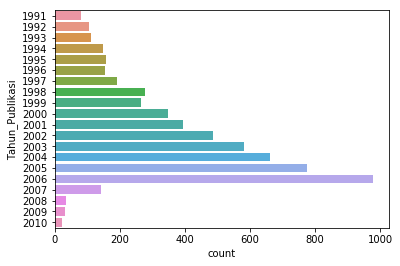

In [39]:
sns.countplot(y="Tahun_Publikasi", data=f_tahun)

In [40]:
book.groupby('Penulis').size().sort_values().tail()

Penulis
['John Saul']                      21
['Roald Dahl', 'Quentin Blake']    21
['Orson Scott Card']               23
['Kurt Vonnegut']                  25
['Dick Francis']                   46
dtype: int64

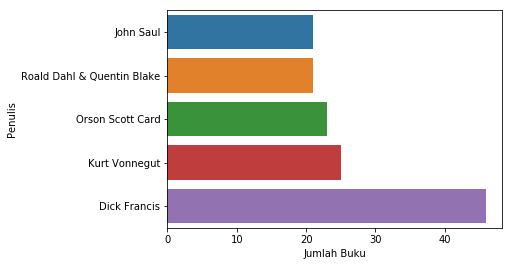

In [41]:
ypenulis=['John Saul','Roald Dahl & Quentin Blake','Orson Scott Card','Kurt Vonnegut','Dick Francis']
xpenulis=[21,21,23,25,46]
sns.barplot(xpenulis,ypenulis)
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.show()

In [42]:
book.groupby('Penerbit').size().sort_values().tail()

Penerbit
Ballantine Books                 64
Oxford University Press, USA     71
Penguin Classics                 76
Vintage                         123
Penguin Books                   130
dtype: int64

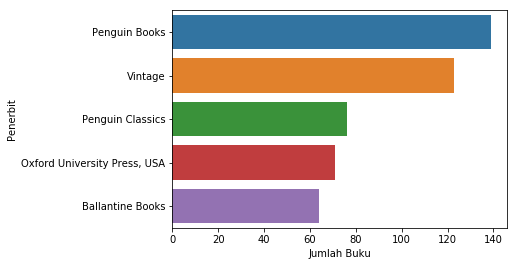

In [43]:
ypenerbit=['Penguin Books','Vintage','Penguin Classics','Oxford University Press, USA','Ballantine Books']
xpenerbit=[139,123,76,71,64]
sns.barplot(xpenerbit,ypenerbit)
plt.xlabel('Jumlah Buku')
plt.ylabel('Penerbit')
plt.show()

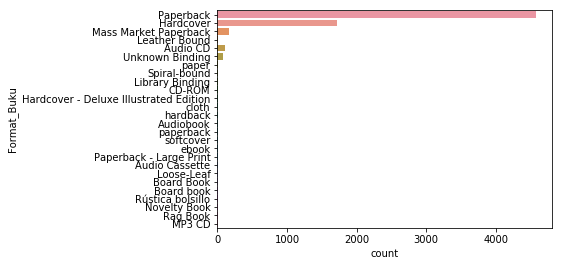

In [44]:
sns.countplot(y='Format_Buku', data=book)

In [65]:
book.groupby('Ebook').size()

Ebook
False    6731
True        8
dtype: int64

In [45]:
print('buku dengan rating tertinggi/maksimal')
max_book_av_rate=pd.DataFrame({"Isbn":(book['Isbn'].where(book['Rataan_Rating']==max(book['Rataan_Rating']))),
                               "Judul_Buku":(book['Judul_Buku'].where(book['Rataan_Rating']==max(book['Rataan_Rating']))),
                           "Rataan_Rating":max(book['Rataan_Rating']),
                               "Penulis":(book['Penulis'].where(book['Rataan_Rating']==max(book['Rataan_Rating']))),
                              "Penerbit":(book['Penerbit'].where(book['Rataan_Rating']==max(book['Rataan_Rating'])))})
max_book_av_rate.dropna()

buku dengan rating tertinggi/maksimal


,Isbn,Judul_Buku,Rataan_Rating,Penulis,Penerbit
253,793565561,A Colorful Symphony: Full Score,5.0,['Robert Xavier Rodríguez'],"G. Schirmer, Inc."
261,1424124255,"Bullets, Badges, and Bullshit",5.0,"[""Phil T. O'Brien""]",PublishAmerica
301,595002234,"New York Trilogy: New York Underground, Trappe...",5.0,['Paul Hallasy'],iUniverse
346,1422004848,21st Century Mysteries: Nikola Tesla: Federal ...,5.0,['U.S. Government'],Progressive Management
407,810943638,African Rock Art: Paintings and Engravings on ...,5.0,['David Coulson'],ABRAMS
524,825617545,The Guitar Chord Deck,5.0,['Ed Lozano'],Music Sales
525,825618932,Guitar Picture Chords in Color,5.0,"['Ed Lozano', 'Various']",Music Sales
576,1847280587,Angelfish,5.0,['Dan Harrington'],Lulu.com
673,793114772,The Real Estate Investor's Tax Guide,5.0,['Vernon Hoven'],Kaplan Publishing
705,1584154888,Bernie Mac,5.0,['Joanne Mattern'],Mitchell Lane Publishers


In [46]:
print('buku 5 teratas berdasarkan total rating')
book.sort_values('Total_Ratings', ascending=False).head()

buku 5 teratas berdasarkan total rating


,Unnamed: 0,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
2,2,3,439554934,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",1997,5750685,4.47,320,70459,Hardcover,False,Scholastic Inc,2
4037,4359,5907,618260307,The Hobbit or There and Back Again,['J.R.R. Tolkien'],2002,2398659,4.27,366,31759,Paperback,False,Houghton Mifflin,1
3477,3758,5107,316769177,The Catcher in the Rye,['J.D. Salinger'],2001,2349845,3.80,277,41948,Paperback,False,Back Bay Books,1
645,690,960,1416524797,"Angels & Demons (Robert Langdon, #1)",['Dan Brown'],2006,2311319,3.89,736,20884,Mass Market Paperback,False,Pocket Books,1
4,4,5,043965548X,Harry Potter and the Prisoner of Azkaban (Harr...,"['J.K. Rowling', 'Mary GrandPré']",2004,2189333,4.56,435,34225,Mass Market Paperback,False,Scholastic Inc.,2


In [47]:
print('buku 5 teratas berdasarkan jumlah review')
book.sort_values('Jumlah_Review', ascending=False).head()

buku 5 teratas berdasarkan jumlah review


,Unnamed: 0,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
2,2,3,439554934,Harry Potter and the Sorcerer's Stone (Harry P...,"['J.K. Rowling', 'Mary GrandPré']",1997,5750685,4.47,320,70459,Hardcover,False,Scholastic Inc,2
592,628,865,61122416,The Alchemist,"['Paulo Coelho', 'Alan R. Clarke', 'Özdemir İn...",1993,1622385,3.85,197,55260,Paperback,False,HarperCollins,3
2516,2695,3636,385732554,"The Giver (The Giver, #1)",['Lois Lowry'],2006,1489579,4.13,208,54710,Paperback,False,Ember,1
5045,5445,7445,074324754X,The Glass Castle,['Jeannette Walls'],2006,767308,4.26,288,44871,Paperback,False,Scribner,1
3477,3758,5107,316769177,The Catcher in the Rye,['J.D. Salinger'],2001,2349845,3.80,277,41948,Paperback,False,Back Bay Books,1


In [48]:
print('buku 5 teratas berdasarkan jumlah Halaman')
book.sort_values('Jumlah_Halaman', ascending=False).head()

buku 5 teratas berdasarkan jumlah Halaman


,Unnamed: 0,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
346,365,499,1422004848,21st Century Mysteries: Nikola Tesla: Federal ...,['U.S. Government'],2006,2,5.00,23931,0,CD-ROM,False,Progressive Management,1
7,8,10,439827604,"Harry Potter Collection (Harry Potter, #1-6)",['J.K. Rowling'],2005,27560,4.73,3342,798,Hardcover,False,Scholastic,1
1512,1610,2154,192547070,The Oxford Illustrated Jane Austen: 6-Volume Set,"['Jane Austen', 'Robert William Chapman']",1988,126,4.79,2832,6,Hardcover,False,"Oxford University Press, USA",2
5558,5995,8219,64400409,The Complete Little House Nine-Book Set (Littl...,"['Laura Ingalls Wilder', 'Garth Williams']",1994,1913,4.34,2700,125,Paperback,False,HarperCollins,2
5,6,8,439682584,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","['J.K. Rowling', 'Mary GrandPré']",2004,38836,4.78,2690,154,Paperback,False,Scholastic,2


In [67]:
print('buku 5 teratas berdasarkan jumlah Penulis')
book.sort_values('Jumlah_Penulis', ascending=False).head()

buku 5 teratas berdasarkan jumlah Penulis


,Unnamed: 0,Id_Buku,Isbn,Judul_Buku,Penulis,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Format_Buku,Ebook,Penerbit,Jumlah_Penulis
6367,6865,9461,802084826,The Self and its Body in Hegel's Phenomenology...,"['Plato', 'John M. Cooper', 'Benjamin Jowett',...",1997,9104,4.35,1838,126,Hardcover,False,"Hackett Publishing Company, Inc.",35
5143,5548,7590,393926796,A Portrait of the Artist As a Young Man,"['James Joyce', 'Walter Hettche', 'Hans Walter...",2007,347,3.61,490,36,Paperback,False,W. W. Norton & Company,25
4927,5315,7277,1405122498,Key Topics in Conservation Biology,"['David W. Macdonald', 'Alonzo C. Addison', 'S...",2006,3,3.33,307,0,Paperback,False,Wiley-Blackwell,23
2882,3096,4140,743276124,Children Playing Before a Statue of Hercules,"['David Sedaris', 'Richard Yates', 'Dorothy Pa...",2005,6336,3.69,344,448,Paperback,False,Simon & Schuster,19
3677,3970,5396,671876090,Dragon's Eye,"['Christopher Stasheff', 'William R. Forstchen...",1994,41,3.46,279,7,Mass Market Paperback,False,Baen Books,13


In [49]:
print('Analisis Korelasi & Regresi')

Analisis Korelasi & Regresi


In [50]:
book.corr()

,Unnamed: 0,Tahun_Publikasi,Total_Ratings,Rataan_Rating,Jumlah_Halaman,Jumlah_Review,Jumlah_Penulis
Unnamed: 0,1.000000,0.032163,-0.044804,-0.021521,-0.055107,-0.039459,-0.040115
Tahun_Publikasi,0.032163,1.000000,0.037746,0.016586,0.014176,0.054915,-0.031082
Total_Ratings,-0.044804,0.037746,1.000000,0.042792,0.029102,0.868189,-0.005654
Rataan_Rating,-0.021521,0.016586,0.042792,1.000000,0.084711,0.051829,0.051291
Jumlah_Halaman,-0.055107,0.014176,0.029102,0.084711,1.000000,0.037359,0.021451
Jumlah_Review,-0.039459,0.054915,0.868189,0.051829,0.037359,1.000000,-0.019611
Jumlah_Penulis,-0.040115,-0.031082,-0.005654,0.051291,0.021451,-0.019611,1.000000


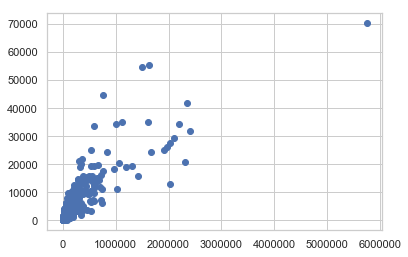

In [70]:
plt.scatter(book['Total_Ratings'], book['Jumlah_Review'])

In [51]:
pearson_coef, p_value = stats.pearsonr(book['Jumlah_Review'], book['Total_Ratings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8681889092883356  with a P-value of P = 0.0


In [52]:
pearson_coef, p_value = stats.pearsonr(book['Jumlah_Penulis'], book['Total_Ratings'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.005653731554468433  with a P-value of P = 0.6426187860717798


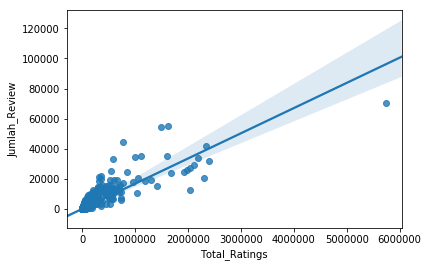

In [53]:
sns.regplot(x="Total_Ratings", y="Jumlah_Review", data=book)

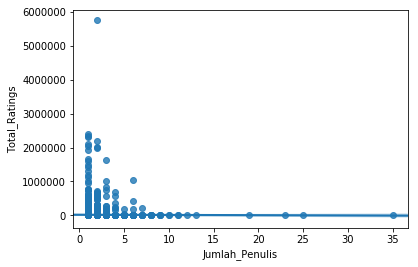

In [54]:
sns.regplot(x="Jumlah_Penulis", y="Total_Ratings", data=book)

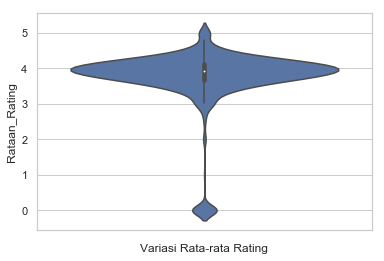

In [55]:
sns.set(style="whitegrid")
sns.violinplot(y=book["Rataan_Rating"])
plt.xlabel('Variasi Rata-rata Rating')
plt.show()

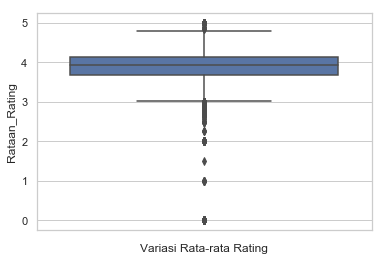

In [56]:
sns.set(style="whitegrid")
sns.boxplot(y=book["Rataan_Rating"])
plt.xlabel('Variasi Rata-rata Rating')
plt.show()

In [57]:
X=book[['Jumlah_Review','Rataan_Rating','Jumlah_Penulis','Jumlah_Halaman']]
Y=book['Total_Ratings']

In [58]:
X=sm.add_constant(X)
LinReg=LinearRegression()
model=sm.OLS(Y,X).fit()
prediksi=model.predict(X)
model.summary()

C:\Users\didiwahyu96\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Ratings   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     5157.
Date:                Wed, 14 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:18:10   Log-Likelihood:                -84236.
No. Observations:                6739   AIC:                         1.685e+05
Df Residuals:                    6734   BIC:                         1.685e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3942.9061   3786.703     -1.041      0.298   -1.14e+04    3480.230
Jumlah_Review     45.0858      0.314    143.384      0.000      44.469      45.702
Rataan_Rating   -397.1875    951.994     -0.417      0.677   -2263.398    1469.023
Jumlah_Penulis  1366.8981    714.550      1.913      0.056     -33.846    2767.642
Jumlah_Halaman    -1.2219      2.192     -0.557      0.577      -5.520       3.076
==============================================================================
Omnibus:                    11685.264   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72687044.838
Skew:                          11.312   Prob(JB):                         0.00
Kurtosis:                     511.284   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X1 = book[['Jumlah_Review']]
Y1 = book['Total_Ratings']
LinReg.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
a=LinReg.intercept_
a

-3597.990222553628

In [61]:
b=LinReg.coef_
b

array([45.06057977])

In [62]:
print("model regresi")
print("Total_Ratings = ",a,"+",b,"*Jumlah_Review")

model regresi
Total_Ratings =  -3597.990222553628 + [45.06057977] *Jumlah_Review


In [63]:
Yhat=LinReg.predict(X1)
Yhat[0:5] 

array([1175637.38222857, 1242867.76723801, 3171325.39944247,
          7351.73066035, 1538600.35223598])

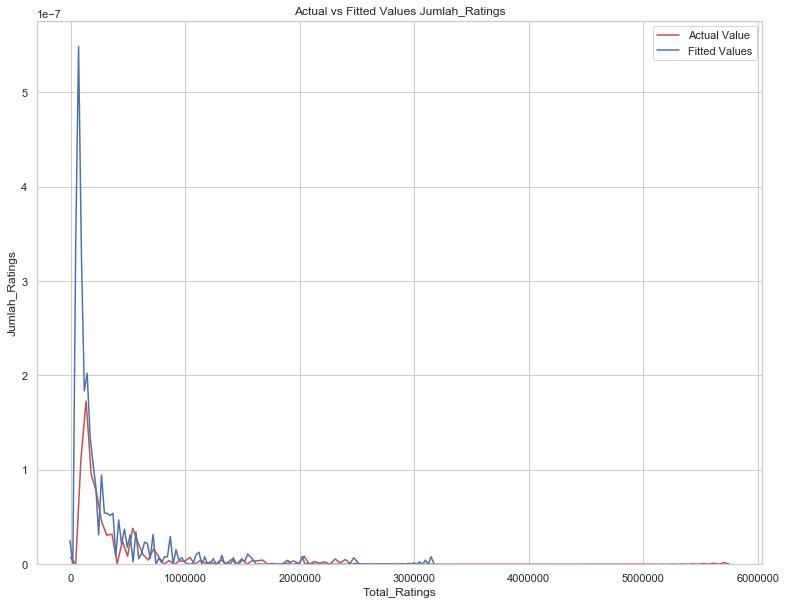

In [64]:
plt.figure(figsize=(13, 10))

ax1 = sns.distplot(book['Total_Ratings'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values Jumlah_Ratings')
plt.ylabel('Jumlah_Ratings')

plt.show()
plt.close()